the average number of updates: 39.988455


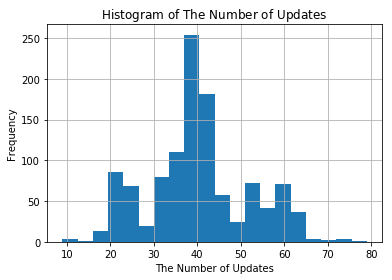

In [1]:
%matplotlib inline
import numpy as np
import random as rd
import matplotlib.pyplot as plt

def sign(xt,wt):
    if np.dot(xt,wt)>0:
        return 1
    else:
        return -1

def InputData(fName):
    f=open(fName)
    text=f.readlines()
    X=[]
    Y=[]
    c=0
    for r in text:
        row=r.strip()
        row=row.replace('\t',' ')
        l=row.split(' ')
        X.append([])
        for i in range(4):
    #         print(l[i])
            X[c].append(float(l[i]))
        Y.append(int(l[4]))
        c+=1
    f.close()
    return X,Y,c

def PLA_Random(X,Y,W,iteration):
    flag=False
    updates=0
    Id=[]
    for i in range(len(Y)):
        Id.append(i)
    
    Idt=Id
    rd.shuffle(Idt)
        
    for j in range(iteration):
        flag=False
        for lp in Idt:
            if sign(X[lp],W) != Y[lp]:
                W=W+Y[lp]*X[lp]
                flag=True
                updates+=1
        if not flag:
#             print("WIN!!",j)
            n_inter=j
            return updates,j
    return updates,999999    

X=[]
Y=[]
X,Y,TrainC=InputData('hw1_7_train.dat')
X=np.array(X)
Y=np.array(Y)
X=np.concatenate((np.ones((len(X),1)),X),axis=1)
W=np.zeros(5)

update_his=[]
Sum_update=0
for i in range(1126):
    updates,loops=PLA_Random(X,Y,W,20000)
    update_his.append(updates)
    Sum_update+=updates
print('the average number of updates: %f'%(Sum_update/1126))

plt.figure()
plt.hist(update_his,bins=20)
plt.ylabel('Frequency')
plt.xlabel('The Number of Updates')
plt.title(r'$\mathrm{Histogram\ of\ The\ Number\ of\ Updates}$')
plt.grid(True)
plt.show()